<a href="https://colab.research.google.com/github/PaulToronto/Toronto-Open-Data---Green-Spaces/blob/main/Toronto_Green_Spaces_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toronto Green Spaces

## Imports

In [1]:
!pip install contextily

In [2]:
import geopandas as gpd
import contextily as cx

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

repos_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Science/Toronto Open Data/'
repos_path += 'Toronto Open Data - Green Spaces/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## The Data

In [4]:
csv_path = repos_path + 'csv_data/Green Spaces - 4326.csv'

green = gpd.read_file(csv_path,
                      GEOM_POSSIBLE_NAMES='geometry',
                      KEEP_GEOM_COLUMNS='NO')

green.shape

(3300, 12)

In [5]:
green.head(2)

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,1,1,,890,OTHER_CEMETERY,None,4009,ARMADALE FREE METHODIST CEMETERY,ARMADALE FREE METHODIST CEMETERY,1,"MULTIPOLYGON (((-79.25752 43.82953, -79.25739 ..."
1,2,2,2,,890,OTHER_CEMETERY,None,4010,HILLSIDE CEMETERY,HILLSIDE CEMETERY,2,"MULTIPOLYGON (((-79.18962 43.82488, -79.18949 ..."


In [6]:
green.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   _id              3300 non-null   object  
 1   AREA_ID          3300 non-null   object  
 2   AREA_ATTR_ID     3300 non-null   object  
 3   PARENT_AREA_ID   3300 non-null   object  
 4   AREA_CLASS_ID    3300 non-null   object  
 5   AREA_CLASS       3300 non-null   object  
 6   AREA_SHORT_CODE  3300 non-null   object  
 7   AREA_LONG_CODE   3300 non-null   object  
 8   AREA_NAME        3300 non-null   object  
 9   AREA_DESC        3300 non-null   object  
 10  OBJECTID         3300 non-null   object  
 11  geometry         3300 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 309.5+ KB


In [7]:
green.crs = 'WGS84'

In [8]:
green.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

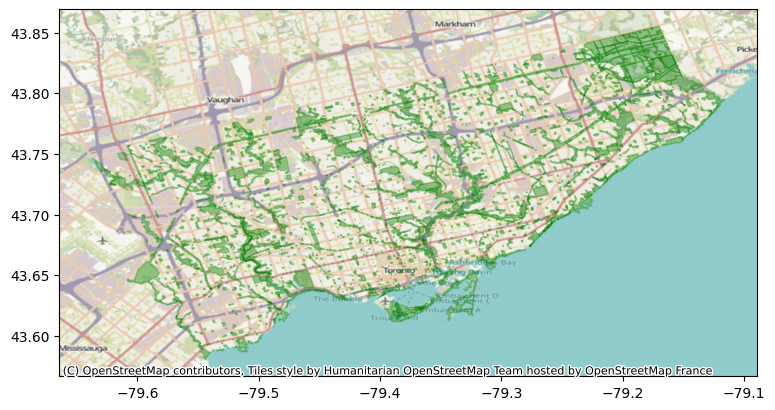

In [9]:
ax = green.plot(facecolor='green', alpha=0.3, figsize=(9, 9), edgecolor='green')
cx.add_basemap(ax,
               crs=green.crs)

In [10]:
green[green['AREA_NAME'] == 'HIGH PARK']

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
3015,3016,41709,484,,802,Park,484,484,HIGH PARK,None,4330451,"MULTIPOLYGON (((-79.47001 43.65207, -79.47002 ..."


In [11]:
high_park = green.query('AREA_NAME == "HIGH PARK"')
high_park

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
3015,3016,41709,484,,802,Park,484,484,HIGH PARK,None,4330451,"MULTIPOLYGON (((-79.47001 43.65207, -79.47002 ..."


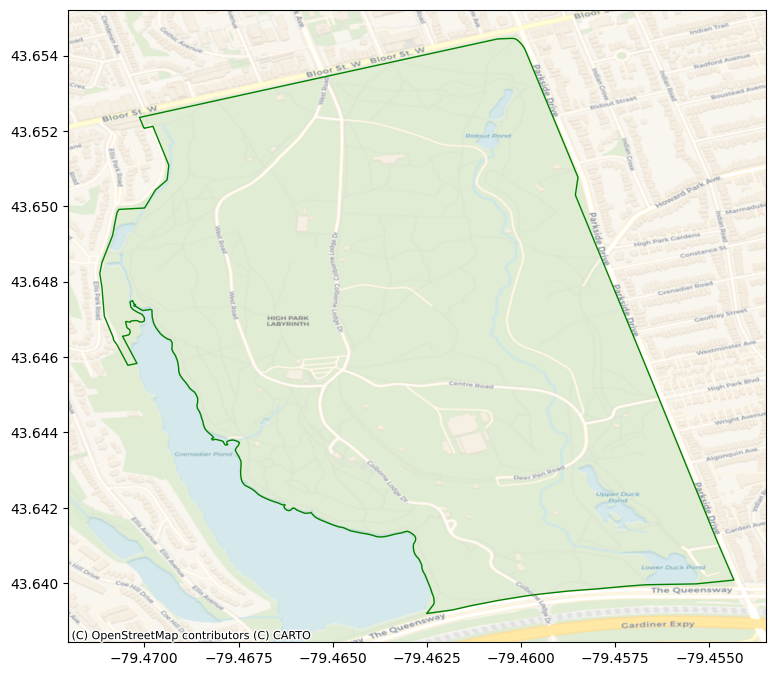

In [12]:
ax = high_park.plot(facecolor='None', edgecolor='green', figsize=(9, 9))
cx.add_basemap(ax,
               crs=high_park.crs,
               source=cx.providers.CartoDB.Voyager)